In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\shiwa\\Desktop\\Projects\\Fraud Detection Model\\Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df2 = df.drop(['type', 'nameOrig', 'nameDest'], axis = 1 , inplace = False)

In [12]:
df2.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [13]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
IQR

step              1.790000e+02
amount            1.953319e+05
oldbalanceOrg     1.073152e+05
newbalanceOrig    1.442584e+05
oldbalanceDest    9.430367e+05
newbalanceDest    1.111909e+06
isFraud           0.000000e+00
isFlaggedFraud    0.000000e+00
dtype: float64

In [14]:
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
outliers = df2[((df2 < lower_bound) | (df2 > upper_bound)).any(axis = 1)]
outliers.sum().sum()

23241961785502.414

In [15]:
df2 = df2.drop(outliers.index)

In [16]:
df2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,1,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [17]:
df2.shape

(4319406, 8)

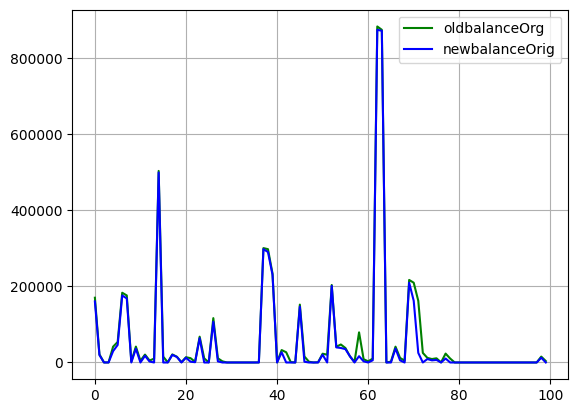

In [46]:
df_sample = df.head(100)
plt.plot(df_sample['oldbalanceOrg'], 'g', label = 'oldbalanceOrg')
plt.plot(df_sample['newbalanceOrig'], 'b', label = 'newbalanceOrig')
plt.grid(True)
plt.legend()
plt.show()

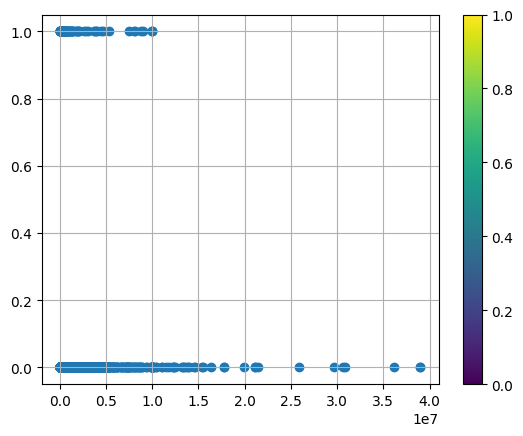

In [47]:
df_sample2 = df.sample(n = 100000)
plt.scatter(df_sample2['amount'],df_sample2['isFraud'])
plt.grid(True)
plt.colorbar()
plt.show()